In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_da4fa0f75b1044758b8f1d337e067007 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_da4fa0f75b1044758b8f1d337e067007 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_da4fa0f75b1044758b8f1d337e067007 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c6tQIOLqxxUruUI4yklro5dgXso6bCbjyDn0tVQignH6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_da4fa0f75b1044758b8f1d337e067007)

body = client_da4fa0f75b1044758b8f1d337e067007.get_object(Bucket='efemoney-donotdelete-pr-htt7bgij6lyson',Key='Book1.xlsx')['Body']

df = pd.read_excel(body.read())
df.head()


,YEAR,GFCF,GRE,GCE,INF,AGR,INT
0,1981,89.38613,4846700000,6567000000,20.812820,2360000000000,3.200833
1,1982,85.94140,5506000000,6417200000,7.697747,2430000000000,1.937500
2,1983,75.75651,4750800000,4885700000,23.212330,2410000000000,2.565000
3,1984,58.95629,5827500000,4100100000,17.820530,2300000000000,1.987500
4,1985,46.39545,7576400000,5464700000,7.435345,2730000000000,0.316667


In [2]:
df.shape

(39, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    39 non-null     int64  
 1   GFCF    39 non-null     float64
 2   GRE     39 non-null     int64  
 3   GCE     39 non-null     int64  
 4   INF     39 non-null     float64
 5   AGR     39 non-null     int64  
 6   INT     39 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.3 KB


In [4]:
df.AGR.max(),df.AGR.min()

(18000000000000, 2300000000000)

In [5]:
df['YEAR']= df['YEAR'].astype(str)
df.dtypes

YEAR     object
GFCF    float64
GRE       int64
GCE       int64
INF     float64
AGR       int64
INT     float64
dtype: object

In [6]:
import numpy as np
df['LAGR'] = np.log(df['AGR'])
df['LGRE'] = np.log(df['GRE'])
df['LGCE'] = np.log(df['GCE'])

In [7]:
df.head()

,YEAR,GFCF,GRE,GCE,INF,AGR,INT,LAGR,LGRE,LGCE
0,1981,89.38613,4846700000,6567000000,20.812820,2360000000000,3.200833,28.489683,22.301564,22.605323
1,1982,85.94140,5506000000,6417200000,7.697747,2430000000000,1.937500,28.518912,22.429104,22.582248
2,1983,75.75651,4750800000,4885700000,23.212330,2410000000000,2.565000,28.510648,22.281579,22.309578
3,1984,58.95629,5827500000,4100100000,17.820530,2300000000000,1.987500,28.463930,22.485854,22.134277
4,1985,46.39545,7576400000,5464700000,7.435345,2730000000000,0.316667,28.635323,22.748304,22.421575


In [8]:
df[['GFCF','LGRE','INF','LGCE','INT','LAGR']].describe()

,GFCF,LGRE,INF,LGCE,INT,LAGR
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,35.943411,26.346423,19.146460,25.717105,6.326455,29.469152
std,19.390479,2.397631,17.062831,2.016909,2.767991,0.705745
min,14.168730,22.281579,5.388008,22.134277,0.316667,28.463930
25%,19.599210,24.340053,8.502851,23.985457,5.303747,28.890732
50%,34.049280,26.858831,12.554960,26.456607,6.777500,29.207936
75%,45.435905,28.576393,18.368570,27.408263,8.088333,30.168295
max,89.386130,29.576931,72.835500,28.459573,11.064170,30.521393


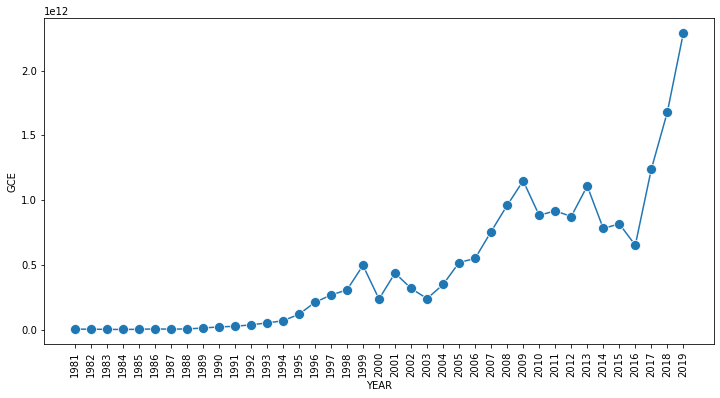

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='GCE', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

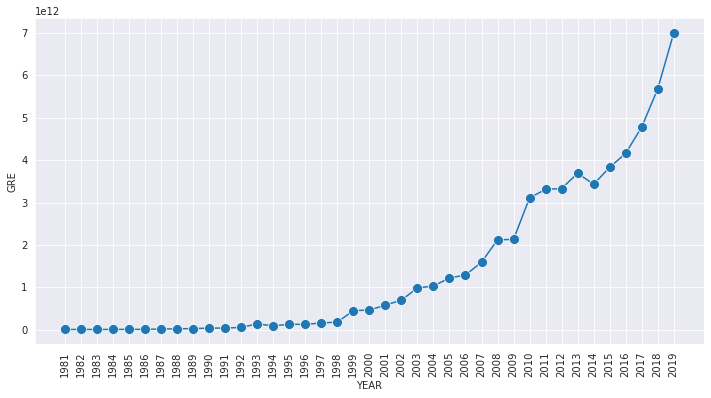

In [10]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='GRE', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

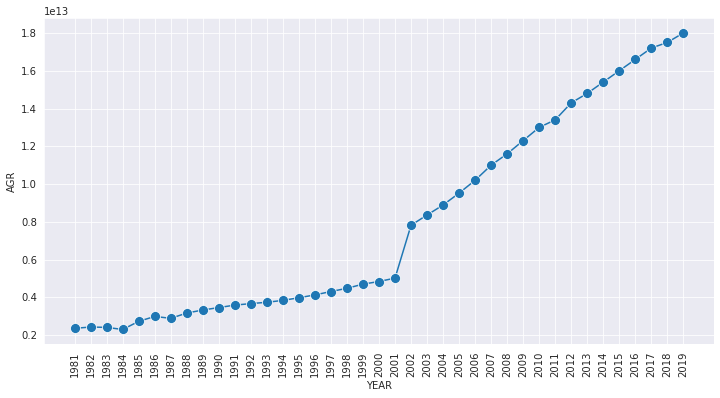

In [11]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='AGR', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

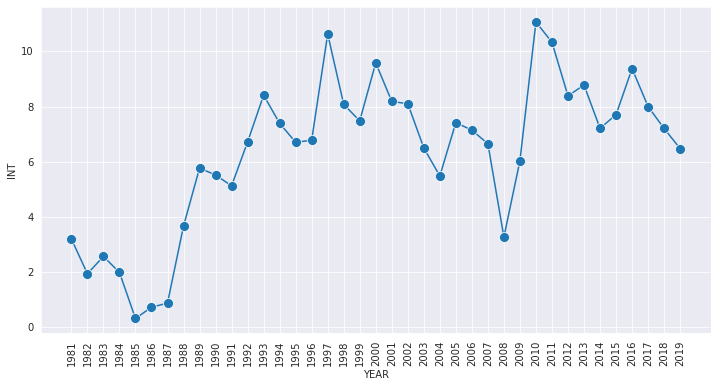

In [12]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='INT', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

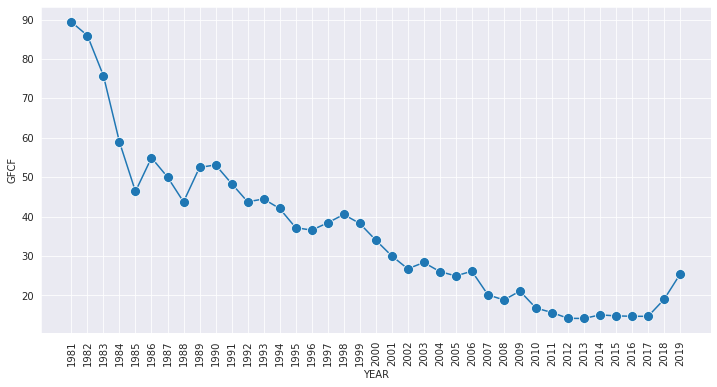

In [13]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='GFCF', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

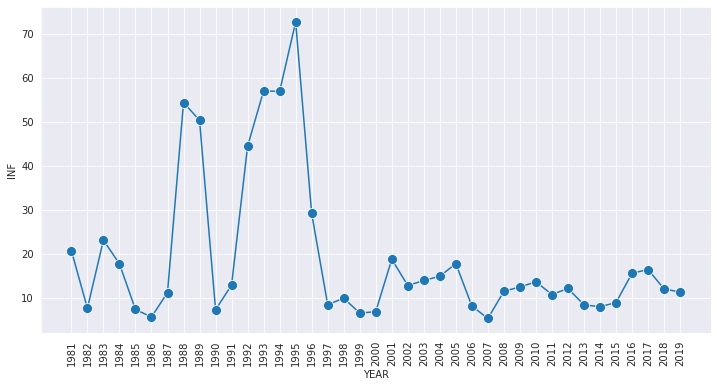

In [14]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.lineplot(x='YEAR', y ='INF', data = df,marker = '.',markersize=20)
plt.xticks(rotation= 90)
plt.show()

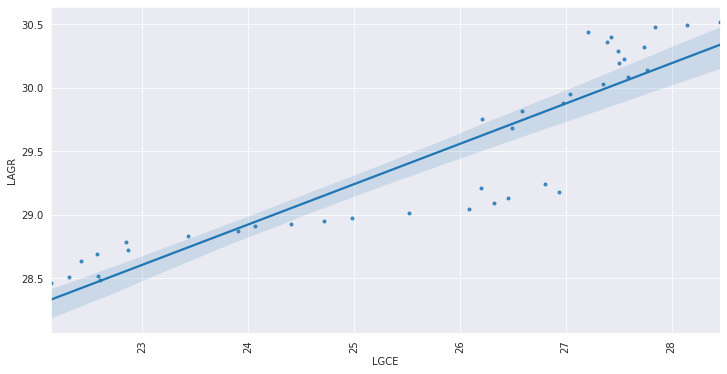

In [15]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.regplot(x='LGCE', y ='LAGR', data = df,marker = '.')
plt.xticks(rotation= 90)
plt.show()

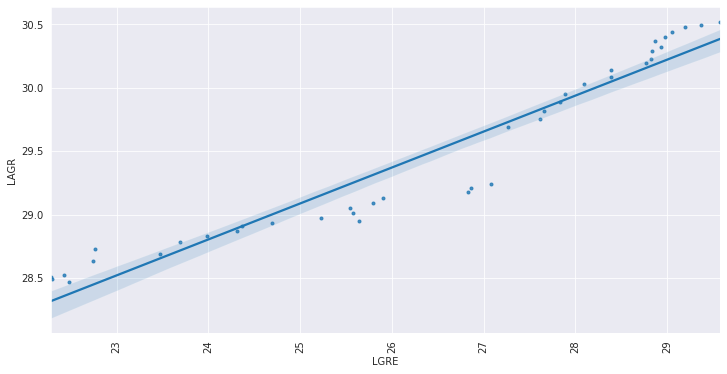

In [16]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.regplot(x='LGRE', y ='LAGR', data = df,marker = '.')
plt.xticks(rotation= 90)
plt.show()

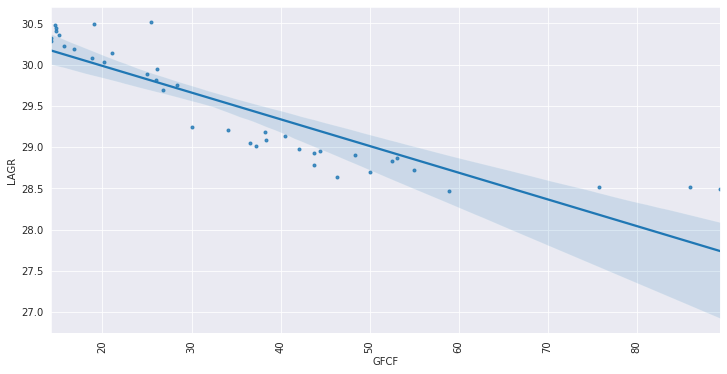

In [17]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.regplot(x='GFCF', y ='LAGR', data = df,marker = '.')
plt.xticks(rotation= 90)
plt.show()

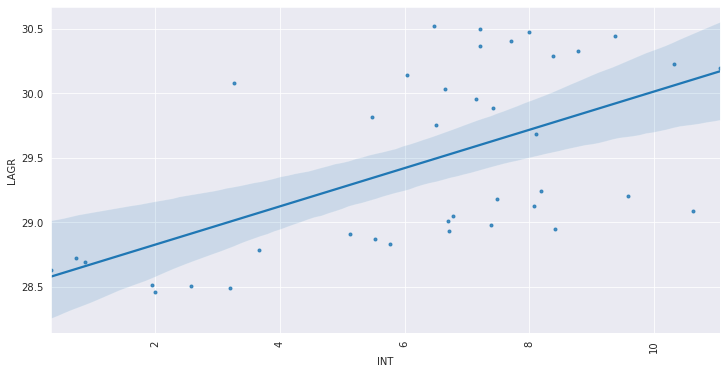

In [18]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.regplot(x='INT', y ='LAGR', data = df,marker = '.')
plt.xticks(rotation= 90)
plt.show()

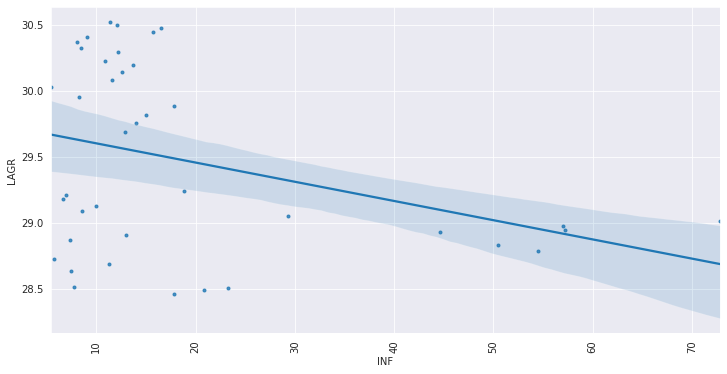

In [19]:
fig, ax = plt.subplots(figsize= (12,6))
sns.set_style('darkgrid')
sns.regplot(x='INF', y ='LAGR', data = df,marker = '.')
plt.xticks(rotation= 90)
plt.show()

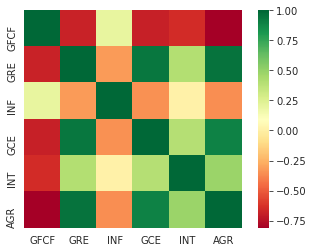

In [20]:
sns.heatmap(df[['GFCF','GRE','INF','GCE','INT','AGR']].corr(),square=True,cmap='RdYlGn')
plt.show()

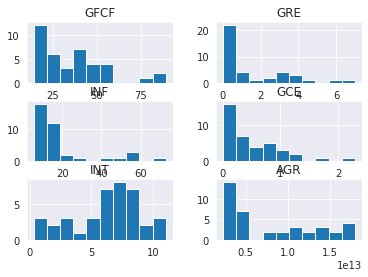

In [21]:
viz= df[['GFCF','GRE','INF','GCE','INT','AGR']]
viz.hist()
plt.show()

In [22]:
cdf = df[['GFCF','LGRE','INF','LGCE','INT', 'LAGR']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test= cdf[~msk]
print(train.shape)
print(test.shape)

(31, 6)
(8, 6)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr = LinearRegression()
x = np.asanyarray(train[['LGRE','LGCE','INT','GFCF','INF']])
y = np.asanyarray(train[['LAGR']])
regr.fit(x,y)
print('Coefficients:', regr.fit(x,y).coef_)

Coefficients: [[ 4.49674725e-01 -1.64571250e-01 -3.62563756e-02  2.17652384e-04
  -1.94749440e-03]]


array([[ 4.49674725e-01, -1.64571250e-01, -3.62563756e-02,
         2.17652384e-04, -1.94749440e-03]])

In [28]:
y_hat = regr.predict(test[['LGRE','LGCE','INT','GFCF','INF']])
x1 = np.asanyarray(test[['LGRE','LGCE','INT','GFCF','INF']])
y1 = np.asanyarray(test[['LAGR']])
print('Residual sum of squares: %.2f' % np. mean((y_hat - y1) ** 2))
print('Variance score: %.2f' % regr.score(x1,y1))
print('r2 score for perfect model is:', r2_score(y1,y_hat))

Residual sum of squares: 0.02
Variance score: 0.97
r2 score for perfect model is: 0.9741338195988145


In [33]:
import statsmodels.formula.api as smf
result = smf.ols('LAGR ~ LGCE + LGRE + GFCF + INT + Q("INF")', data=cdf).fit()
result.params

Intercept    21.600591
LGCE         -0.172137
LGRE          0.473468
GFCF          0.002865
INT          -0.038118
Q("INF")     -0.002119
dtype: float64

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LAGR   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           4.01e-23
Time:                        06:15:44   Log-Likelihood:                 24.409
No. Observations:                  39   AIC:                            -36.82
Df Residuals:                      33   BIC:                            -26.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6006      0.886     24.393      0.000      19.799      23.402
LGCE          -0.1721      0.055     -3.152      0.003      -0.283      -0.061
LGRE           0.4735      0.053      8.896      0.000       0.365       0.582
GFCF           0.0029      0.003      0.887      0.382      -0.004       0.009
INT           -0.0381      0.013     -2.831      0.008      -0.066      -0.011
Q("INF")      -0.0021      0.002     -1.393      0.173      -0.005       0.001
==============================================================================
Omnibus:                        9.477   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.156
Skew:                          -1.174   Prob(JB):                       0.0103
Kurtosis:                       3.344   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
result.conf_int()

,0,1
Intercept,19.798961,23.402222
LGCE,-0.283255,-0.061020
LGRE,0.365183,0.581754
GFCF,-0.003709,0.009438
INT,-0.065511,-0.010724
"Q(""INF"")",-0.005216,0.000977


In [103]:
B0  = 21.600591
B1  = -0.172137
x11 = 26.20          #Future value for LGCE
B2=  0.473468
x21 =26.86           #Future value for LGRE
B3=  0.002865
x31 =28.64           #Future value for GFCF
B4= -0.038118
x41 =5.371           #Future value for INT
B5= -0.002119
x51 =13.25           #Future value for INF

model = (B0) + (B1 * x11) + (B2 * x21) + (B3 *x31) + (B4*x41) + (B5 *x51)
#Intercept     21.600591
#LGCE         -0.172137
#LGRE          0.473468
#GFCF          0.002865
#INT          -0.038118
#INF          -0.00211
#MODEL = Intercept + LGCE(X11) + LGRE(X21) + GFCF(X31) + INT(X41) + INF(X51)
print('Prediction:', model)

Prediction: 29.657197152


In [107]:
np.exp(29.657197152)

7585025965554.635

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [36]:
Input =[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
xx = cdf[['GFCF','LGRE','INF','LGCE','INT']]
yy = cdf['LAGR']
pipe = Pipeline(Input)
pipe.fit(xx,yy)
pipe.score(xx,yy)

0.9919386736377603

In [37]:
PR =PolynomialFeatures(degree = 2)
X= PR.fit_transform(train[['LGRE','LGCE','INT','GFCF','INF']])
X1 =  PR.fit_transform(test[['LGRE','LGCE','INT','GFCF','INF']])

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.1)
ridge.fit(x,y)
print(ridge.score(x1,y1))

0.9733601323457743


In [50]:
ridge.fit(X,y)
ridge.score(X1,y1)

0.9533922814304552